# Energía potencial gravitatoria

[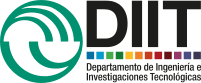](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Nuevamente, el Péndulo con punto de suspensión libre

Para que un péndulo actúe como tal evidentemente tiene que afectar la fuerza peso ejercida sobre las masas.

Reproducimos el mismo enunciado, pero encaramos una discusión más amplia sobre cuantas coordenadas son necesarias para describir el sistema, antes de resolverlo.

### Enunciado

La partícula de masa $m_2$ pende de una barra rígida de longitud $\ell$ de masa despreciable.
El otro extremo de la misma está engarzada a una barra rígida dispuesta a lo largo del eje $\hat{x}$.
El dispositivo de engarce tiene una masa $m_1$.

1. Escriba la energía cinética, $T$ y potencial, $V$, en función de las coordenadas generalizadas sugeridas por la figura.
1. Verifique que al fijar la masa $m_1$ recupera las expresiones de $T$ y $V$ de un péndulo ideal.

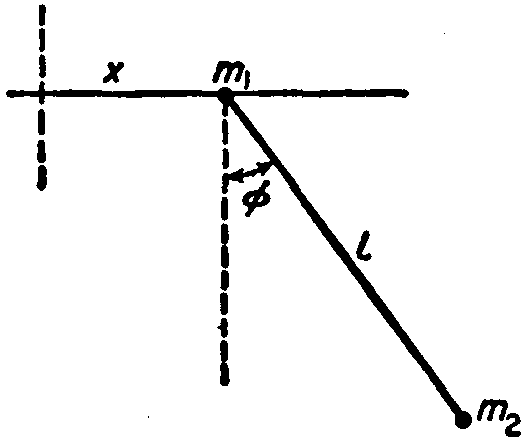

## Coordenadas generalizadas
> Referencia:
> - Sección $\S1$ "Coordenas generalizadas"
Mecánica, Lev Davidovich Landau, y E. M. Lifshitz, Reverté, 1994
> - Apunte Lanczos $\S 2.2$ "Coordenadas generalizadas" (PDF en directorio EulerLagrange del repositorio)

Ambas partículas puntuales, la de masa $m_1$ y la de $m_2$, debieran gozar de sus 3 **grados de libertad** en un mundo tridimensional.
La descripción de la dinámica de este sistema de $P=2$ partículas requeriría de $3 P = 6$ coordenadas para sus posiciones y también $3P = 6$ velocidades.

Pero a las partículas les imponemos **restricciones que quitan grados de libertad**:
1. El movimiento se limita al plano $\rightarrow$ dos restricciones.
2. La partícula $1$ está engarzada en la corredera horizontal $\rightarrow$ una restricción.
3. La $2$ no tiene más remedio que estar separada en $\ell$ de $1$ $\rightarrow$ otra restricción.

Un total de $K = 4$ restricciones, que reducen los grados de libertad del sistema a $3 P - K = 2$.
Es decir que solo $2$ coordenadas generalizadas (y sus respectivas derivadas en el tiempo) bastan para definir la dinámica del sistema.

La expresión $$\boxed{3P-K}$$ permite obtener el número de coordenadas generalizadas que se requieren para modelizar un sistema.  

### Notación
Para describir los $N$ grados de libertad usaremos $q_1, q_2,\dots,q_N$ **coordenadas generalizadas**.
- No necesariamente son las coordenadas en un sistema, e.g. $(\rho,\varphi, \theta)$ en el esférico.
- Pueden ser cualquier magnitud que nos permita determinar posiciones, e.g. una coordenada en el sistema cartesiano puede ser función de estas $x_1= f(q_1, q_2,\dots,q_N)$.

Sabemos que para describir la dinámica de un sistema no alcanza las con posiciones, requerimos además de las velocidades.
Así que nos interesarán también las **velocidades generalizadas**: $\dot{q}_1, \dot{q}_2,\dots,\dot{q}_N$.

## Resolución del ejercicio

>- Sección 5 ($\S 5$) Ejercicio 2  
Mecánica, Lev Davidovich Landau, y E. M. Lifshitz, Reverté, 1994

Copiamos todos los pasos debajo, aun los ya escritos, para que pueda "copiar y pegar" lo siguiente para la resolución de cualquier ejercicio.

In [1]:
# Importar funciones de mecánica de SymPy.
import sympy as sm # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as me # de sympy utilizaremos funciones de mecánica
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
# sistema de referencia
e = me.ReferenceFrame('e') # marco referencial en coordenadas cartesianas

In [3]:
# parámetros físicos del sistema
g, m1, m2, l = sm.symbols('g, m_1, m_2, \ell', positive=True) # Escribirlos tras el subguión hace que los números aparezcan como subíndices. 

<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_16543/303475812.py:2: SyntaxWarning: invalid escape sequence '\e'
  g, m1, m2, l = sm.symbols('g, m_1, m_2, \ell', positive=True) # Escribirlos tras el subguión hace que los números aparezcan como subíndices.


### Posiciones

In [4]:
# posición de la primer partícula
x = me.dynamicsymbols('x') # x cambiara con el tiempo, por tanto es una variable dinámica
partícula1_r = x* e.x # posición de la partícula de masa m1
partícula1_r

In [5]:
# posición de la segunda partícula
phi = me.dynamicsymbols('phi')
partícula2_r = partícula1_r + l*( sm.sin(phi)* e.x + sm.cos(phi)* (-e.y) )  # y versor apunta hacia arriba
partícula2_r

En este problema las coordenadas generalizadas usadas fueron solo dos, $x$ y $\phi$.
Con estas escribimos su posición en un sistema de referencia cartesiano.

### Energía cinética de traslación

In [6]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sm.Eq(
        sm.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_16543/3054262066.py:18: SyntaxWarning: invalid escape sequence '\d'
  Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}


In [7]:
# Energía cinética del sistema
partícula1_T = energíaCinéticaTraslación(m1, partícula1_r, e)
partícula2_T = energíaCinéticaTraslación(m2, partícula2_r, e)
T = sm.Eq(
  partícula1_T.lhs,
  partícula1_T.rhs + partícula2_T.rhs
  ).simplify() 
T

------------------------------------------------

## Fuerza gravitatoria
Hay cuatro fuerzas en física:
- gravitatoria
- nuclear débil
- electromagnética
- nuclear fuerte

que para enormes niveles de energía (e.g. aceleradores de partículas, fenómenos cosmológicos) se van unificando: primero la electro-débil, luego con más energía su suma la fuerte.
Se espera que pueda unificarse la gravitatoria en nuevas teorías, haciendo que todas las fuerzas del universo sean en realidad una única.

Pero en nuestra vida cotidiana las interacciones son de baja energía y **casi todas son electromagnéticas**.
Cuando empujamos un objeto compuesto por moléculas y/o átomos en una red cristalina los electrones en las moléculas de nuestra mano se repelen con los del objeto.
Tanta es la repulsión que evita que moléculas de la mano se liguen dentro del objeto y nos fundamos con él.
Los adhesivos son la excepción, pues se hacen con moléculas de fuerte polaridad eléctrica. 

Decimos que **casi todas** las interacciones cotidianas son electromagnéticas porque la **fuerza gravitatoria** es la gran excepción.
Más allá de las pavadas que inventan los llamados "astrólogos" para hacer dinero, los planetas no ejercen una interacción considerable en nosotros, pues la fuerza gravitatoria decrece con el cuadrado de la distancia.
Hay un planeta que es la excepción, el nuestro.
La fuerza gravitatoria que nos hace es tan fuerte que le damos nombre propio: el **peso**.

### ¿Qué es el peso?
Es el nombre que se da a la **fuerza gravitatoria** que sufren cuerpos con masa $m$ a una altura no muy alejada de la superficie terrestre.
¿Por qué esto de la altura?

Comparemos la fuerza que la Tierra ejerce sobre la Luna y sobre Marte
La Tierra les ejerce cierta atracción gravitatoria, pero la distancia hace que su efecto sea muy distinto.
Casi imperceptible en Marte pero importarte sobre la Luna al punto de obligarle a orbitarle.

A una distancia de $\approx 6350 \mathrm{km}$ del centro del planeta el campo gravitatorio de la Tierra imprime a toda $m$ en su superficie una aceleración que llamamos $\vec{g}$, lo que resulta en la fuerza peso
$$
    \vec{P} = m \vec{g}.
$$

Como bien sabemos el signo que tenga esta fuerza dependerá de como se haga la elección del sentido positivo para los ejes del sistema de coordenadas.
Pero debe quedar claro que
- Alejar esta $m$ en contra del sentido de $\vec{g}$
    - insume hacer un trabajo sobre este cuerpo, es decir es positivo,
    - y gana energía potencial.
- Por el contrario, si dejamos que "caiga" espontáneamente
    - este trabajo nos es devuelto, es decir un trabajo de signo negativo,
    - y pierde energía potencial

Y esto será así **sin importar como hayamos elegido el sentido de los ejes del sistema de coordenadas**. 

## Fuerzas conservativas y energía potencial
La relación de una fuerza conservativa y la función del potencial que describe al campo que la genera es 
$$
\vec{F}= - \vec{\nabla} V.
$$

Trabajaremos en el **sistema de coordenadas cartesianas** por la que una posición será
$$
\vec{r} = (x,y,z) = x \hat{x} + y \hat{y} + z \hat{z}.
$$

Para calcular la fuerza debe usarse el operador divergencia $\vec{\nabla}$ para este sistema de coordenadas.
Este operador vectorial se aplica sobre el potencial $V = V(x,y,z)$ que es una función escalar (es decir no vectorial)
$$
\vec{F} 
= - \vec{\nabla}V 
= - \left( \frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z} \right) V 
= - \left( \frac{\partial V}{\partial x} \hat{x} + \frac{\partial V }{\partial y} \hat{y} + \frac{\partial V}{\partial z} \hat{z} \right) .
$$

### Orientación de los ejes
Orientaremos el sistema de ejes de forma que las direcciones horizontales $\hat{x}$ y $\hat{y}$ sean paralelas a _un piso_, y en vertical $\hat{z}$.

#### Eje $\hat{z}$ orientado hacia arriba
Como la aceleración gravitatoria apunta hacia abajo
$$
\vec{g} = g (-\hat{z}),
$$
la expresión para la fuerza peso es
$$
\vec{P} = m (-g \hat{z}).
$$

Con tal expresión se calcula la energía potencial gravitatoria
$$
\vec{P} = m (-g \hat{z}) = - \vec{\nabla} V = - \frac{\mathrm{d} V}{\mathrm{d} z} \hat{z},
$$
donde solo queda la componente en $\hat{z}$ en la divergencia del potencial, pues la fuerza no tiene componentes en otra dirección.
Para obtener $V$ hay que integrar
$$
\begin{aligned}
m g (- \hat{z}) &= - \frac{\mathrm{d} V}{\mathrm{d} z} \hat{z}\\
m g (- \hat{z}) \mathrm{d} z &= - \mathrm{d} V \hat{z}\\
m (g \hat{z}) \int \mathrm{d} z &= \int \mathrm{d} V \hat{z} \\
m g z \biggr\rvert_{z_0}^z &= V \biggr\rvert_{z_0}^z\\
m g (z - z_0) &= V(z) - V(z_0).
\end{aligned}
$$

El potencial $V(z) = m g (z - z_0) + V(z_0)$ está definido a partir de uno de referencia $V(z_0)$ evaluado en un nivel de referencia $z_0$.
Si $z_0 = 0$ y $V(z_0) = 0$, estableciendo el potencial de referencia en el origen (i.e. el _cero de potencial en el piso_) se obtiene
$$
V(z) = m g z.
$$
Es decir que **a medida que sube**, se incrementa $z$, **aumenta el potencial**.

#### Eje orientado hacia abajo
Con $\hat{z}$ _hacia abajo_
$$
\vec{g} = g ( \hat{z}),
$$
entonces
$$
\begin{aligned}
m g \hat{z} &= - \frac{\mathrm{d} V}{\mathrm{d} z} \hat{z}\\
m g \hat{z} \mathrm{d} z&= - \mathrm{d} V \hat{z}\\
m g \hat{z}\int \mathrm{d} z &= - \int \mathrm{d} V \hat{z}\\
m g z \biggr\rvert_{z_0}^z &= - V \biggr\rvert_{z_0}^z \\
m g (z - z_0) &= - V(z) + V(z_0).
\end{aligned}
$$

Si nuevamente establecemos $z_0 = 0$ y $V(z_0) = 0$ llegamos a 
$$
V(z) = -m g z,
$$
y aquí **también a medida que sube**, es decirse se reduce $z$, **aumenta el potencial**.

## Una formulación general para la energía potencial gravitatoria

La energía potencial es el negativo de la divergencia.
Entonces para la gravitatoria es el negativo de la fuerza peso por la altura.
Esto se resume en
$$
\boxed{
V = - (m \vec{g}) \cdot \vec{r} = - \vec{P} \cdot \vec{r}
}
,
$$
donde en el vector posición $\vec{r}$ influye la altura en la proyección que corresponda a la elección del sistema de referencia.

Pongamos esto a prueba.
Sí orientamos el eje $\hat{z}$ en el sentido **hacia arriba** de la vertical
$$
\begin{aligned}
V &= - \vec{P} \cdot \vec{r}\\
V &= - (m (-g \hat{z}) ) \cdot (x \hat{x} + y \hat{y} + z \hat{z}) = - (m g (-\hat{z}) ) \cdot (z \hat{z})\\
V &= m g z \hat{z} \cdot \hat{z} = m g z,
\end{aligned}
$$
puesto que $\hat{z} \cdot \hat{z} = 1$, se arriba a la misma expresión que se obtuvo integrando.

Con $\hat{z}$ **hacia abajo**
$$
\begin{aligned}
V &= - \vec{P} \cdot \vec{r}\\
V &= - (m (g \hat{z} ) ) \cdot (z \hat{z}) = - m g z
,
\end{aligned}
$$
que es la expresión que se obtuvo para este caso.

---------------------------------

## Volviendo al problema

Solo la partícula con `m_2` se desplaza en una dirección en que cambia su potencial gravitatorio.
Por tanto, la energía potencial gravitatoria para el sistema de este problema se puede calcular según lo siguiente.
$$
\begin{aligned}
V(\varphi)
&= -\vec{P}_2 \cdot \vec{r}_2 \\
&= - [m_2 (g (- \hat{y} ) ] \cdot (x_2 \hat{x} + y_2 \hat{y}) \\
&= - (- m_2 g\hat{y} ) \cdot ( y_2 \hat{y}) \\
&= (m_2 g) \hat{y} \cdot (-\ell \cos{(\varphi)} ) \hat{y} \\
&= - \ell g m_2 \cos{(\varphi)}.
\end{aligned}
$$

In [8]:
partícula2_r

In [9]:
# Energía potencial
partícula1_V = 0
partícula2_peso = m2* g* (- e.y) # peso
partícula2_V = - partícula2_peso.dot(partícula2_r) # acá se calcula -P producto escalar con la posición
V = sm.Eq(sm.Symbol('V'), (partícula1_V + partícula2_V ) )
V

De igual forma que se hizo para la energía cinética de traslación, es tentador fabricar una función que calcule la energía potencial gravitatoria de cada partícula del sistema a partir de
$$
V_\mathrm{gravitatoria} = - \vec{P} \cdot \vec{r} = - (m \vec{g}) \cdot \vec{r}
$$

In [16]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    r"""
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sm.Eq(
        sm.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

In [11]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
partícula1_V = energíaPotencialGravitatoria(m1, partícula1_r, g_vector)
partícula2_V = energíaPotencialGravitatoria(m2, partícula2_r, g_vector)
V = sm.Eq(
  partícula1_V.lhs,
  partícula1_V.rhs + partícula2_V.rhs
  ).simplify()
V

Mostrando que se obtiene el mismo resultado que calculándole "a mano", y que no hay que contemplar a la partícula con posición `m1_r` como un caso particular.

---------------------------------

## Péndulo ideal

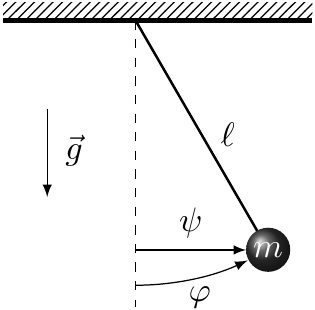

### Energía cinética

Dado que la longitud $\ell$ es constante es conveniente trabajar en coordenadas cilíndricas.
En estas un péndulo rígido e ideal tiene una única componente no nula de su velocidad: la que va en $\hat{\varphi}$ es decir $\dot{\vec{r}} \cdot \hat{\varphi}= \ell \dot{\varphi}$.
Así
$$
T= \frac{m}{2} \dot{\vec{r}}^2= \frac{m}{2} \ell^2 \dot{\varphi}^2.
$$


En la expresión de la energía cinética del sistema anterior no figura la coordenada generalizada de la $m_1$ que es $x$, la posición de la suspensión

In [12]:
T

Pero si figura la velocidad generalizada $\dot{x}$ que corresponde a esa coordenada.
Si el punto de suspensión estará fijado, evidentemente $\dot{x}$ debe ser $0$.

In [13]:
t = sm.symbols('t') # tiempo, lo defino para poder derivar sin refencia a marco de refererencia
suspensiónFija_T = T.subs(x.diff(t), 0) # subs: substitución
suspensiónFija_T

En esa expresión se puede obtener un factor común $\ell^2 \dot{\varphi}^2$ dejando entre paréntesis la suma del cuadrado del seno y la del coseno.
Esto como sabemos se simplifica en un $1$.

In [14]:
suspensiónFija_T.simplify()

Esta es la misma expresión de $T$ que la del péndulo ideal.

### Energía potencial

El potencial gravitatorio es $V(y)= m g y$.
Se establece que para $y=0$ es nulo, es decir $V(y=0)= 0$.
Y dado que se utilizaron coordenadas cilíndricas $y= -\ell \cos{\phi}$, entonces
$$
V(\phi)= -m g \ell \cos{\phi}.
$$

Como ni $x_1$ ni $\dot{x}_1$ tienen ningún papel en la energía potencial esta es la misma en el péndulo que en este sistema. 

In [15]:
V